In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
%matplotlib inline 

pd.set_option('display.precision', 2)
sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/titanic/heart_disease_uci.csv")
df = df.dropna()
df.head(2)

id  age   sex    dataset              cp  trestbps   chol    fbs  \
0   1   63  Male  Cleveland  typical angina     145.0  233.0   True   
1   2   67  Male  Cleveland    asymptomatic     160.0  286.0  False   

          restecg  thalch  exang  oldpeak        slope   ca          thal  num  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0  fixed defect    0  
1  lv hypertrophy   108.0   True      1.5         flat  3.0        normal    2

In [3]:
print(f"Records: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Records: 299
Columns: 16


Index(['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], dtype='object', name='cp')

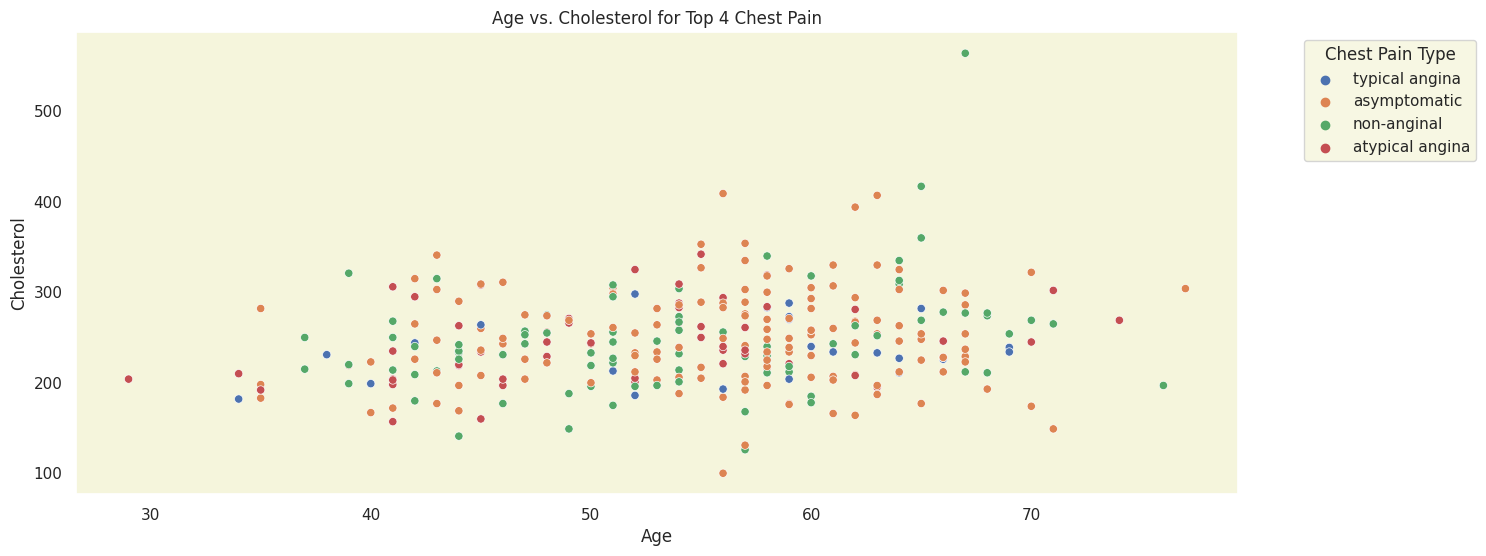

In [4]:
top_leagues = df['cp'].value_counts().nlargest(4).index
display(top_leagues)

plt.figure(figsize=(15, 6))
sns.scatterplot(x='age', y='chol', data=df[df['cp'].isin(top_leagues)], hue='cp')
plt.title('Age vs. Cholesterol for Top 4 Chest Pain')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
import plotly.express as px


fig = px.scatter(df, x='chol', y='age', color='sex')  

fig.update_layout(width=1200, height=600)

fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by Sex)')

fig.show()

In [6]:
from plotly.offline import iplot

fig = px.box(x = df["age"], 
            labels={"x":"Age"},
            title="5-Number-Summary(Box Plot) of Age")
iplot(fig)

In [7]:
import plotly.express as px


fig = px.scatter(df, x='chol', y='age', color='cp', size = 'oldpeak', size_max = 30, hover_name = 'exang')  

fig.update_layout(width=1800, height=600)

fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by cp)')

fig.show()

In [8]:
fig = px.scatter(data_frame = df, 
                 x="age", 
                 y="chol", 
                 color="cp",
                 size='ca', 
                 hover_data=['oldpeak'])

fig.update_layout(title_text="<b> Cholesterol Vs Age <b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=1500, 
                  height=750,
                 )

fig.show()

In [9]:
import plotly.express as px


fig = px.scatter(df, x='chol', y='age', color='cp', size = 'oldpeak', size_max = 30, hover_name = 'exang',facet_col = 'cp', log_x = True )  

fig.update_layout(width=1600, height=600)

fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by cp)')

fig.show()

**hover_name='exang' means that the values in the 'exang' column will be shown as tooltips when you hover over the data points on the scatter plot. This is useful for providing additional information about each data point without cluttering the plot with labels.**

In [10]:
fig=px.bar(df,x='age',y='chol',hover_data=['oldpeak'],color='sex',height=400)
fig.show()

In [11]:
def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    return rating_df

rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope')

fig.update_traces(textposition='auto',  
                  textfont_size=20)  

fig.update_layout(barmode='stack')

fig.show()

In [12]:
def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    return rating_df

rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope')

fig.update_traces(textposition='auto',  
                  textfont_size=20)  

fig.update_layout(barmode='group')

fig.show()

In [13]:
import plotly.express as px

def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    return rating_df

rating_df = generate_rating_df(df)


fig = px.bar(rating_df, x='cp', y='counts', color='slope', barmode='group', 
             text='counts',  
             )  

fig.update_traces(textposition='auto', 
                  textfont_size=20)  

fig.show()


In [14]:
def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    
    # Calculate percentages
    total_counts = rating_df['counts'].sum()
    rating_df['percentage'] = rating_df['counts'] / total_counts * 100
    
    return rating_df

rating_df = generate_rating_df(df)

fig = px.bar(rating_df, x='cp', y='counts', color='slope', text='percentage')

fig.update_traces(
    texttemplate='%{text:.1f}%',  
    textposition='outside',       
    textfont_size=16              
)

fig.update_layout(
    barmode='group',
    yaxis_title='Count',
    xaxis_title='CP',
    legend_title='Slope'
)

fig.update_layout(
    height=550,  
    width=1500,   
    title_text="Distribution of Chest Pain Type by Percentage",
    title_font_size=24
)


fig.show()

In [15]:
fig = px.scatter(data_frame = df, 
                 x="age", 
                 y="chol", 
                 color="cp",
                 size='ca', 
                 hover_data=['oldpeak'],
                 marginal_x="histogram", 
                 marginal_y="box",)

fig.update_layout(title_text="<b> Age vs Cholesterol <b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=1500, 
                  height=750,
                 )

fig.show()

In [16]:
fig = px.scatter(data_frame = df, 
                 x="age", 
                 y="chol", 
                 color="thalch",
                 size='ca', 
                 hover_data=['oldpeak'],
                 marginal_x="histogram", 
                 marginal_y="box")

fig.update_layout(title_text="<b> Age vs Cholesterol <b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=1500, 
                  height=750,
                 )

fig.show()

In [17]:
fig = px.scatter(data_frame = df, 
                 x="age", 
                 y="chol", 
                 size ="ca",
                 size_max=30,
                 color= "sex",
                 trendline="ols")
fig.update_layout(title_text="<b> Age vs Cholesterol <b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=1500, 
                  height=750,
                 )

fig.show()

In [18]:
fig = px.scatter(data_frame = df, 
                 x="age", 
                 y="chol", 
                 size ="ca",
                 size_max=30,
                 color= "sex",
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="black")

fig.update_layout(title_text="<b>Chest Pain vs Gender<b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=1500, 
                  height=750,
                 )
fig.show()

In [19]:
fig= px.histogram(df, x='age',height=500,width=900,template='simple_white',
                  color='sex', # adding categorical column 
                  color_discrete_sequence=['purple','pink'])




fig.update_layout(title={'text':'Histogram of Persons by Age','font':{'size':25}}
                    ,title_font_family="Times New Roman",
    title_font_color="darkgrey",
    
                 
                 title_x=0.2)

fig.update_layout(
    font_family='classic-roman',
                  font_color= 'grey',
                  yaxis_title={'text': " count", 'font': {'size':18}},
                xaxis_title={'text': " Age", 'font': {'size':18}}
)
fig.show()


In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your DataFrame
asymptomatic = df[df['cp'] == 'asymptomatic']
non_anginal = df[df['cp'] == 'non-anginal']
atypical_angina = df[df['cp'] == 'atypical angina']
typical_angina = df[df['cp'] == 'typical angina']

fig = make_subplots(rows=2, 
                    cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}], 
                           [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=("Asymptomatic", "Non-Anginal",
                                    "Atypical Angina", "Typical Angina"))

fig.add_trace(go.Pie(labels=asymptomatic["thal"], values=asymptomatic["chol"], name="asymptomatic"), 1, 1)
fig.add_trace(go.Pie(labels=non_anginal["thal"], values=non_anginal["chol"], name="non_anginal"), 1, 2)
fig.add_trace(go.Pie(labels=atypical_angina["thal"], values=atypical_angina["chol"], name="atypical_angina"), 2, 1)
fig.add_trace(go.Pie(labels=typical_angina["thal"], values=typical_angina["chol"], name="typical_angina"), 2, 2)

# Update layout to increase the size of the plot and add main title
fig.update_layout(
    height=1200,  
    width=1500,   
    title_text="Distribution of Cholesterol Levels by Chest Pain Type",
    title_font_size=24
)

# Update traces
fig.update_traces(textposition='inside', textfont_size=16)
fig.update_annotations(font_size=20)
fig.show()

In [21]:
import plotly.express as px


fig = px.scatter(df, x='chol', y='age', color='cp', size = 'oldpeak', size_max = 30, hover_name = 'exang', range_x = [100,800], range_y = [0, 100],
                labels = dict(oldpeak = 'oldpeak', chol = 'Cholestrol', age = "Age" ), animation_frame = "chol", animation_group = 'cp')  

fig.update_layout(width=1800, height=600)

fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by cp) with Animation')

fig.show()

In [22]:
from plotly.offline import iplot

gender = df["sex"].value_counts()
display(gender.head().to_frame())

fig = px.bar(data_frame=gender,
       x = gender.index,
       y = gender, 
       color=gender.index,
       text_auto="0.3s",
       labels={"y": "Frequency", "index": "Gender"}
      
      )
fig.update_traces(textfont_size=24)

iplot(fig)

count
sex          
Male      203
Female     96

In [23]:
from plotly.offline import iplot

category = df["cp"].value_counts()

fig = px.bar(category,
             x = category.index,
             y =  (category / sum(category)) *  100,
             color=category.index,
             labels={"y" : "Frequency in (Percentage%)", "category":"Category"},
             title="Frequency of Chest Pain Category in Percentage",
             text = category.apply(lambda x: f'{(x / sum(category)) * 100:.1f}%'),
             template="plotly_dark"
            )

fig.update_layout(showlegend=False)
fig.update_traces(
    textfont= {
        "family": "consolas",
        "size": 20,  
    }
)


iplot(fig)

In [24]:
from plotly.offline import iplot

ChestPain = df["cp"].value_counts()

fig = px.pie(values=ChestPain, names = ChestPain.index, 
             color_discrete_sequence= ["#98EECC", "#FFB6D9", "#99DBF5"],
             template="plotly_dark"
            )

fig.update_traces(textposition='inside', textfont_size= 20, textinfo='percent+label')
fig.update_layout(showlegend=True,width=1300, height=600)

iplot(fig)

In [25]:
cp = df["cp"].value_counts()

fig = px.bar(cp,
             y = cp.index,
             x = (cp / sum(cp)) *  100, 
             color=cp.index,
             labels={"x" : "Frequency in Percentage(%)", "cp":"Chest Pain"},
             orientation="h",
             title="Frequency of Chest Pain",
             text = cp.apply(lambda x: f'{(x / sum(cp)) * 100:.1f}%'),
            )

fig.update_layout(showlegend=True,width=1300, height=600)

fig.update_traces(
    textfont= {
        "family": "consolas",
        "size": 20  
    }
)


iplot(fig)

In [26]:
fig=px.pie(df.groupby('cp',as_index=False)['sex'].count().sort_values(by='sex',ascending=False).reset_index(drop=True),
           names='cp',values='sex',color='sex',color_discrete_sequence=px.colors.sequential.Plasma_r,
           labels={'cp':'Chest Pain','Sex':'Count'}, template='seaborn',hole=0.4)

fig.update_layout(autosize=False, width=1200, height=700,legend=dict(orientation='v', yanchor='bottom',y=0.40,xanchor='center',x=1),title='Chest Pain',
                  title_x=0.5, showlegend=True)

fig.update_traces(
    textfont= {
        "family": "consolas",
        "size": 20  
    }
)

fig.show()

In [27]:
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(1,2,subplot_titles=('Age Distribution','Log Age Distribution'))

fig.append_trace(go.Histogram(x=df['age'],
                             name='Age Distribution') ,1,1)

fig.append_trace(go.Histogram(x=np.log10(df['age']),
                              name='Log Age Distribution')  ,1,2)

iplot(dict(data=fig))

In [28]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

# Calculate quartiles and IQR
Q25 = np.quantile(df['chol'], q=0.25)
Q75 = np.quantile(df['chol'], q=0.75)
IQR = Q75 - Q25
cut_off = IQR * 1.5

# Print number of outliers
print('Number of Cholesterol Lower Outliers:', df[df['chol'] <= (Q25 - cut_off)]['chol'].count())
print('Number of Cholesterol Upper Outliers:', df[df['chol'] >= (Q75 + cut_off)]['chol'].count())

# Group by 'cp' and sort by 'age'
temp = df.groupby('cp').sum().sort_values('age', ascending=False)

# Create bar data
data = [
    go.Bar(x=temp.index, y=temp['age'], name='Age', text=temp['age'], textposition='auto'),
    go.Bar(x=temp.index, y=temp['chol'], name='Cholesterol', text=temp['chol'], textposition='auto')
]

# Define layout
layout = go.Layout(
    xaxis=dict(title='Chest Pain', titlefont=dict(size=25)),
    yaxis=dict(title='Values', titlefont=dict(size=25)),
    showlegend=True,
    width=1300,
    height=600
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)


Number of Cholesterol Lower Outliers: 1
Number of Cholesterol Upper Outliers: 5


In [29]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Assuming df is your DataFrame
top_03_cp = df.groupby('cp').sum()['age'].sort_values(ascending=False)[0:3]
top_03_AGE = df.groupby(by='cp').sum().sort_values(by='age', ascending=False)[0:3]['chol']

data = [
    go.Bar(
        x=top_03_cp.index,
        y=top_03_cp,
        name='Top 3 age',
        text=top_03_cp,
        textposition='auto'
    ),
    go.Bar(
        x=top_03_AGE.index,
        y=top_03_AGE,
        name='Top 3 cholesterol',
        text=top_03_AGE,
        textposition='auto'
    )
]

layout = go.Layout(
    title="Grouped Bar Plot For Age and Cholesterol<br>(For The Top Three types of Chest Pain)",
    barmode='group'
)

iplot(dict(data=data, layout=layout))


In [30]:
# Visualization 5: Plotly Express 3D Scatter Plot
fig = px.scatter_3d(df, x='chol', y='trestbps', z='oldpeak', color='slope', size='age', hover_name='cp')
fig.show()

In [31]:
import plotly.express as px

fig = px.scatter_3d(df, x='chol', y='trestbps', z='oldpeak', color='num', size='age', hover_name='cp')
fig.show()

In [32]:
# Visualization 5: Plotly Express 3D Scatter Plot
fig = px.scatter_3d(df, x='chol', y='trestbps', z='fbs', color='slope', size='age', hover_name='cp')
fig.show()

In [33]:
import plotly.express as px

fig = px.scatter_3d(df, x='thal', y='cp', z='oldpeak', color='num', size='age', hover_name='cp')
fig.show()

In [34]:
import plotly.express as px

fig = px.scatter_3d(df, x='chol', y='cp', z='oldpeak', color='num', size='age', hover_name='cp')
fig.show()

In [35]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=df.age,
    y=df.chol,
    z=df.cp,
    mode='markers',
    marker=dict(
        size=4,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [36]:
import plotly.express as px
import plotly.io as pio
import seaborn as sns
# Set the color theme for the entire notebook
sns.set_theme(style="whitegrid", palette="muted")
sns.set_palette("dark:orange_r")

# Set a color scheme with blue and orange
color_palette = ["#FF7F0E", "#1F77B4"]

pio.renderers.default = 'notebook'  # For notebook environments

# 3D scatter plot of Age, Total Price, and Quantity
fig = px.scatter_3d(df, x='age', y='chol', z='cp',
                    color='sex', size='num',
                    title="3D Scatter Plot: Age vs chol vs Chest Pain",
                    color_discrete_sequence=color_palette)

# Update layout for better viewing
fig.update_traces(marker=dict(size=4))
fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Chol',
                    zaxis_title='Chest Pain'),
                    margin=dict(l=0, r=0, b=0, t=50))

# Show plot
fig.show()

In [37]:
gap_df = pd.read_csv("/kaggle/input/titanic/gapminder_full.csv")

display(gap_df.head(2))

fig = px.bar(data_frame=gap_df, 
             x="continent", 
             y="population", 
             color="continent",
             animation_frame="year", 
             animation_group="country", 
             range_y=[0,4000000000])
fig.show()

country  year  population continent  life_exp  gdp_cap
0  Afghanistan  1952     8425333      Asia     28.80   779.45
1  Afghanistan  1957     9240934      Asia     30.33   820.85

In [38]:
# Create the scatter plot with the outlier-filtered data
fig = px.scatter(gap_df, x='gdp_cap', y='life_exp', color='continent',
                 size='population', size_max=60, hover_name="country")

fig.update_layout(
    height=550,  
    width=1500,   
    title_text="Distribution of GDP Cap Vs Life Exp With Outliers",
    title_font_size=24
)

fig.show()

In [39]:
import pandas as pd
import plotly.express as px

# Assuming you have the gap_df DataFrame loaded

# Calculate the IQR for both 'gdp_cap' and 'life_exp'
Q1_gdp_cap = gap_df['gdp_cap'].quantile(0.25)
Q3_gdp_cap = gap_df['gdp_cap'].quantile(0.75)
IQR_gdp_cap = Q3_gdp_cap - Q1_gdp_cap

Q1_life_exp = gap_df['life_exp'].quantile(0.25)
Q3_life_exp = gap_df['life_exp'].quantile(0.75)
IQR_life_exp = Q3_life_exp - Q1_life_exp

# Filter out outliers based on IQR
gap_df_no_outliers = gap_df[(gap_df['gdp_cap'] >= Q1_gdp_cap - 1.5 * IQR_gdp_cap)
                            & (gap_df['gdp_cap'] <= Q3_gdp_cap + 1.5 * IQR_gdp_cap)
                            & (gap_df['life_exp'] >= Q1_life_exp - 1.5 * IQR_life_exp)
                            & (gap_df['life_exp'] <= Q3_life_exp + 1.5 * IQR_life_exp)]

# Create the scatter plot with the outlier-filtered data
fig = px.scatter(gap_df_no_outliers, x='gdp_cap', y='life_exp', color='continent',
                 size='population', size_max=60, hover_name="country")

fig.update_layout(
    height=550,  
    width=1500,   
    title_text="Distribution of GDP Cap Vs Life Exp without Outliers",
    title_font_size=24
)

fig.show()

In [40]:
fig = px.scatter(gap_df,x='gdp_cap',y='life_exp',color='continent',size='population',size_max=60,hover_name="country",
           animation_frame="year",animation_group='country',log_x=True,range_x=[100,100000],range_y=[25,90],
           labels=dict(Population ="Populations",gdp_cap="Gdp Per Capital",life_exp="Life Expentacy"))

fig.update_layout(
    height=550,  
    width=1500,   
    title_text="Distribution of GDP Cap Vs Life Expentacy",
    title_font_size=24
)

fig.show()

In [41]:
#Grouping the data by state
df1 = df[['cp','age','chol','num']]
df1.groupby('cp').sum().head(10).style.background_gradient(cmap='Blues')

In [42]:
import pandas as pd
import plotly.express as px

grouped_df = df.groupby(['cp', 'thal']).size().reset_index(name='count')

fig = px.bar(grouped_df, 
             y="cp",
             x='count',
             color='thal',
             title='Count of Passengers by cp and thal',
             labels={'count': 'Number of Patients'},
             text_auto=True)
fig.show()

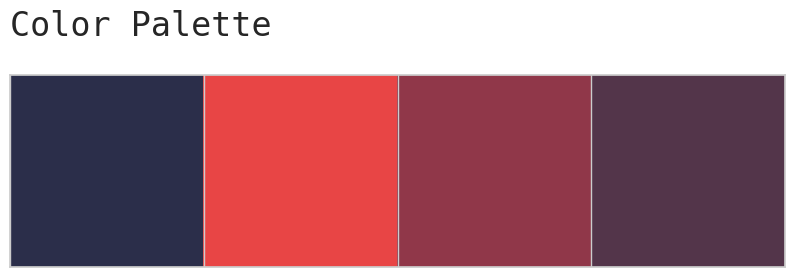

In [43]:
# color palette for visualizations
import matplotlib.pyplot as plt

colors = ['#2B2E4A', '#E84545', '#903749', '#53354A',]
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size = 2.5)

plt.text(-0.5,
         -0.7,
         'Color Palette', 
         {'font':'monospace',
          'size': 24,
          'weight':'normal'}
        )

plt.show()

In [44]:
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'


import plotly.figure_factory as ff

_ = df.groupby(['cp', 'thal']).chol.size().unstack()
z = _.values.tolist()
x = _.columns.tolist()
y = _.index.tolist()

fig = ff.create_annotated_heatmap(z = z,
                                  x = x,
                                  y = y,
                                  xgap = 3,
                                  ygap = 3,
                                  colorscale = ['#53354A', '#E84545']
                                 )

title = format_title('cp',
                     'thal.',
                     'Chol',
                     12
                    )

fig.update_layout(title_text = title,
                  title_x = 0.5,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  
                  xaxis = {'side': 'bottom'},
                  xaxis_showgrid = False,
                  yaxis_showgrid = False,
                  yaxis_autorange = 'reversed',                   
                  )

fig.show()

In [45]:
# available templates
template = ['ggplot2','plotly_dark', 'seaborn', 'simple_white', 'plotly']


fig = px.histogram(df, 
                   x="cp", 
                   y=None, 
                   color="sex",
                   width=1200,
                   height=450,
                   histnorm='percent',
                   color_discrete_map={
                       "male": "RebeccaPurple", "female": "lightsalmon"
                       },
                   template="plotly_dark"
                   )

fig.update_layout(title="Gender Chest Pain", 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 24},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.25, xanchor="right")                
                  )
fig.show()


In [46]:
from plotly.subplots import make_subplots

# data students performance
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                          ])
fig.add_trace(
    go.Pie(
        labels=df['cp'],
        title="Chest Pain",
                  titlefont={'size':20, 'family': 'Serif',},
        values=None,
        hole=0.85,
        ),  col=1, row=1, 
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    )

fig.add_trace(
    go.Pie(
        labels=df['cp'],
        title="Chest Pain",
                  titlefont={'size':20, 'family': 'Serif',},
        values=None,
        hole=0.5,
        ),  col=2, row=1, 
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    )
fig.layout.update(title="<b> Heart Disesse <b>",
                  titlefont={'size':20, 'family': 'Serif',},
                  showlegend=False, 
                  height=600, 
                  width=1500, 
                  template=None, 
                 )

fig.show()

In [47]:
from plotly.subplots import make_subplots

# data titanic
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                          ])
fig.add_trace(
    go.Pie(
        labels=df['cp'],
        values=None,
        hole=.4,
        title='Chest Pain',
        titlefont={'color':None, 'size': 24},       

        ),
    row=1,col=1
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=['lightgray', 'lightseagreen'],
        line=dict(color='#000000',
                  width=2)
        )
    )

fig.add_trace(
    go.Pie(
        labels=df['sex'],
        values=None,
        hole=.4,
        title='Sex',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=16,
    marker=dict(
        colors=['lightgray', 'lightseagreen'],
        line=dict(color='#000000',
                  width=2)
        )
    )
fig.layout.update(title="<b> Heart Desies <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'San-Serif'},
                  showlegend=False, 
                  height=600, 
                  width=950,
                  )
fig.show()

In [48]:
# data students performance
fig = px.sunburst(df,
                  path=['cp', 'sex'])
fig.update_layout(title_text="<b>Chest Pain vs Gender<b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750,
                 )
fig.show()

In [49]:
fig = px.histogram(df, x="cp", 
                   width=600, 
                   height=400,
                   histnorm='percent',
                   category_orders={
                       "cp": ["asymptomatic", "non-anginal", "atypical angina", "typical angina"],
                       "sex": ["Male", "Female"]
                   },
                   color_discrete_map={
                       "Male": "RebeccaPurple", "Female": "lightsalmon",
                       },
                   template="simple_white"
                   )

fig.update_layout(title="Chest Pain Type", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 
# custom color
colors = ['gray',] * 4
colors[3] = 'crimson' 
colors[0] = 'lightseagreen' 


fig.update_traces(marker_color=colors, marker_line_color=None,
                  marker_line_width=2.5, opacity=None)
fig.show()

In [50]:
fig = px.histogram(df, x="cp",
                   width=600, 
                   height=500,
                   histnorm='percent',
                   template="simple_white",
                   )
fig.update_layout(title="Types of Chest Pain", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  showlegend=True,
                  legend=dict(
                      orientation="v",
                      y=1.0, 
                      yanchor="top", 
                      x=1.0, 
                      xanchor="right"
                  )                 
                 )
fig.update_traces(marker_color=None, marker_line_color='white',
                  marker_line_width=1.5, opacity=0.99)
fig.show()

In [51]:
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

data = df[['sex']]

fig = px.histogram(df, 
                   y="sex",
                   orientation='h',
                   width=800,
                   height=350,
                   histnorm='percent',
                   template="plotly_dark"
                   )
fig.update_layout(title="<b>Heart Disease<b>", 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 28},
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.2,
                        text='Heart Disease',
                             font=dict(family='Arial', size=16, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.50, y=0.85,
                        text='30.4%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=1.08, y=0.19,
                        text='69.6%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))

fig.update_layout(
    autosize=False,
    width=800,
    height=350,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=120,
    ),
)

fig.update_layout(annotations=annotations)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

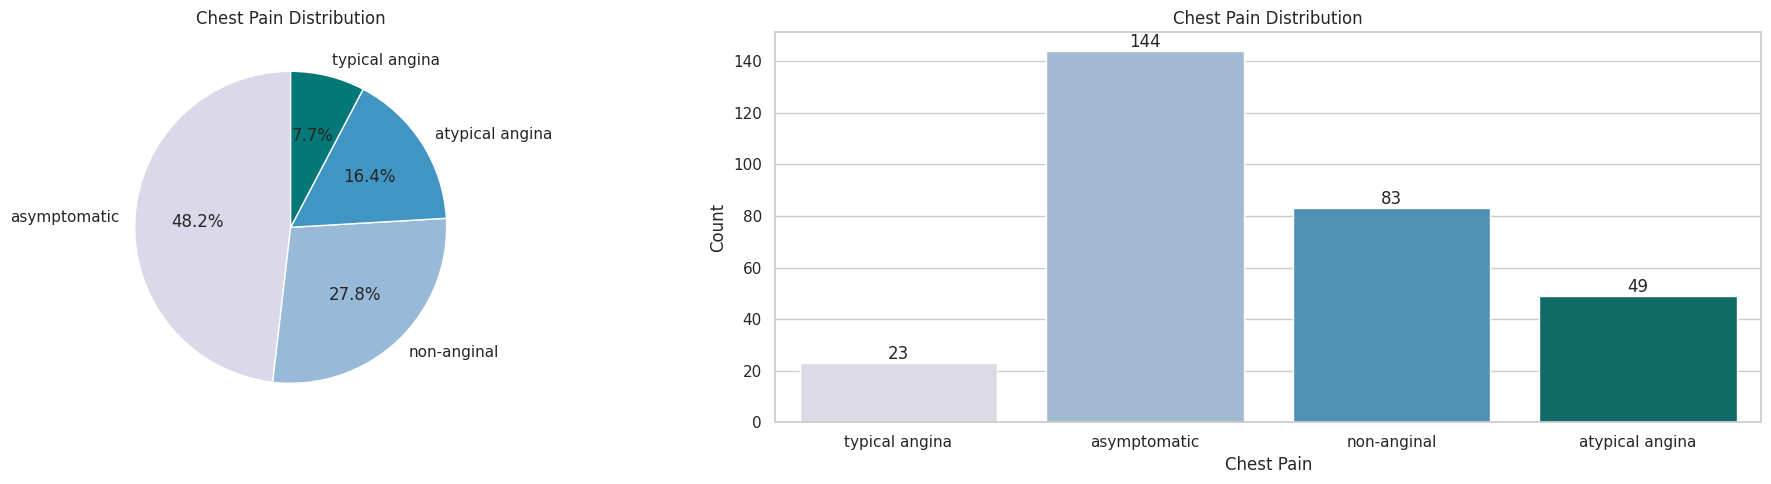

In [52]:
# Plotting the pie chart
plt.figure(figsize=(20, 5))

# Pie chart
plt.subplot(1, 2, 1)
quality_counts = df['cp'].value_counts()
plt.pie(quality_counts, labels=quality_counts.index, colors=sns.color_palette('PuBuGn', len(quality_counts)), autopct='%1.1f%%', startangle=90)
plt.title('Chest Pain Distribution')

# Count plot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='cp',palette='PuBuGn')

# Add count values above each bar
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='edge')

plt.title('Chest Pain Distribution')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

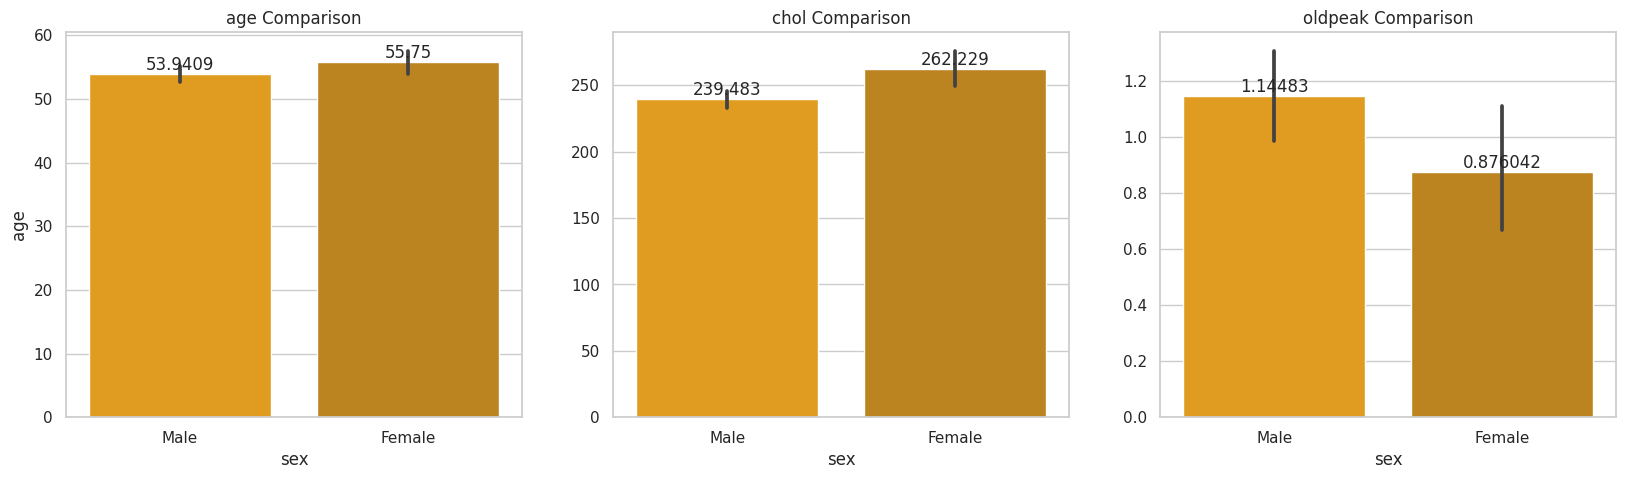

In [53]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(['age', 'chol', 'oldpeak'], 1):
    plt.subplot(1, 3, i)
    ax = sns.barplot(x='sex', y=col, data=df)
    plt.title(f'{col} Comparison')
    plt.ylabel(col if i == 1 else '')
    
    # Add count values above each bar
    for i in range(len(ax.containers)):
        ax.bar_label(ax.containers[i], label_type='edge')
    
plt.show()

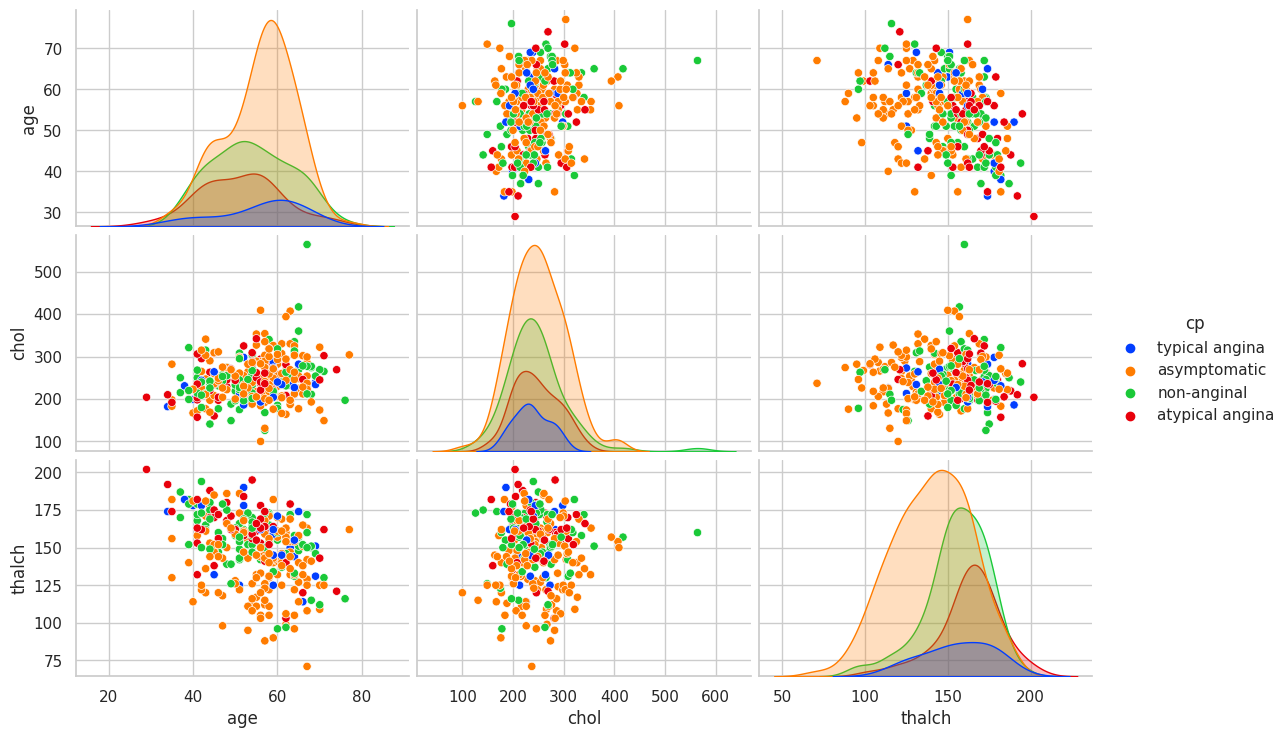

In [54]:
sns.pairplot(df[['cp','age','chol','thalch']], hue='cp', aspect=1.5,dropna=True,palette='bright')
plt.show()

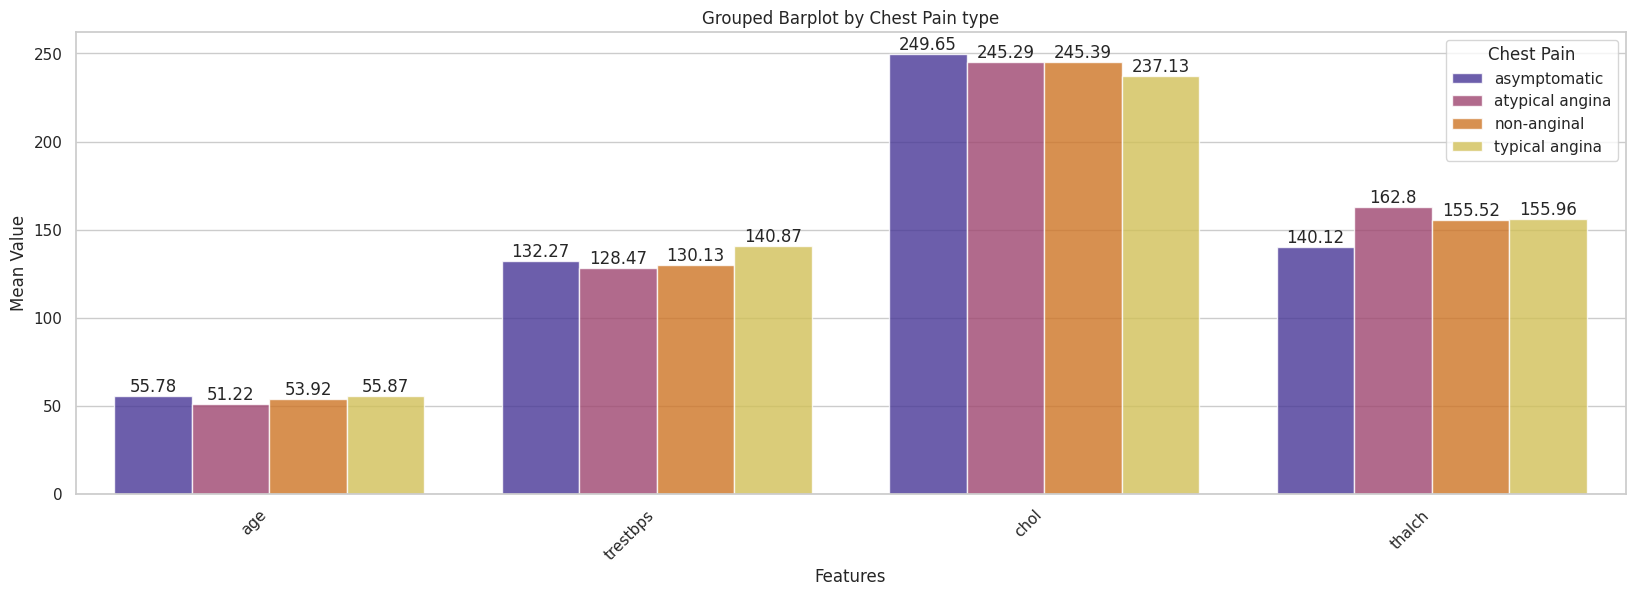

In [55]:
# Group by quality and calculate the mean for each quality
grouped_mean = df[['cp','age','trestbps','chol','thalch']].groupby('cp').mean().round(2)

plt.figure(figsize=(20, 6))

# Plot the grouped bars using Seaborn's barplot
ax = sns.barplot(data=grouped_mean.reset_index().melt(id_vars='cp'),
            x='variable', y='value', hue='cp', palette='CMRmap', alpha=0.8)

# Add count values above each bar
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='edge')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Grouped Barplot by Chest Pain type')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.legend(title='Chest Pain')
plt.show()

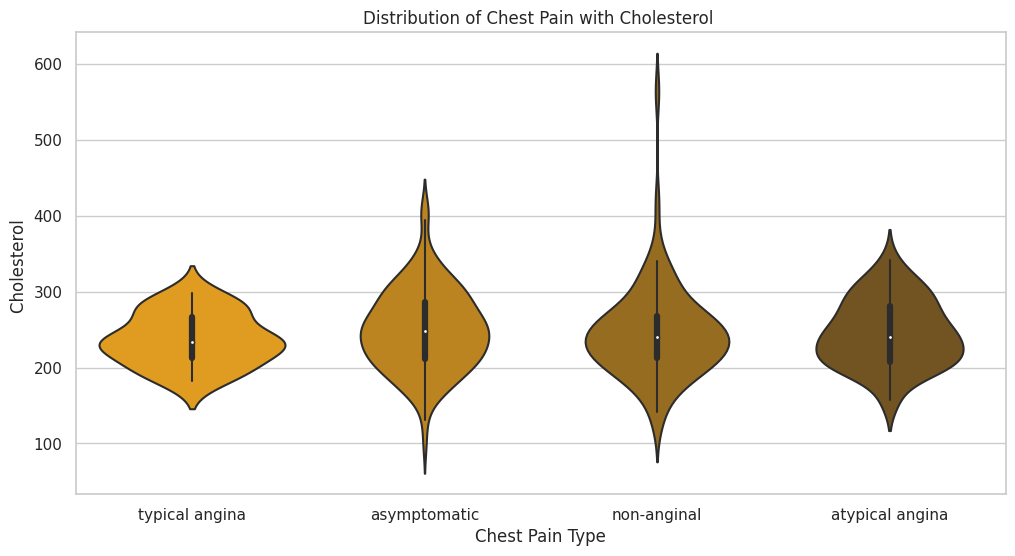

In [56]:
# Visualization 8: Violin Plot - Skill Moves Distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='cp', y='chol', data=df)
plt.title('Distribution of Chest Pain with Cholesterol ')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol ')
plt.show()

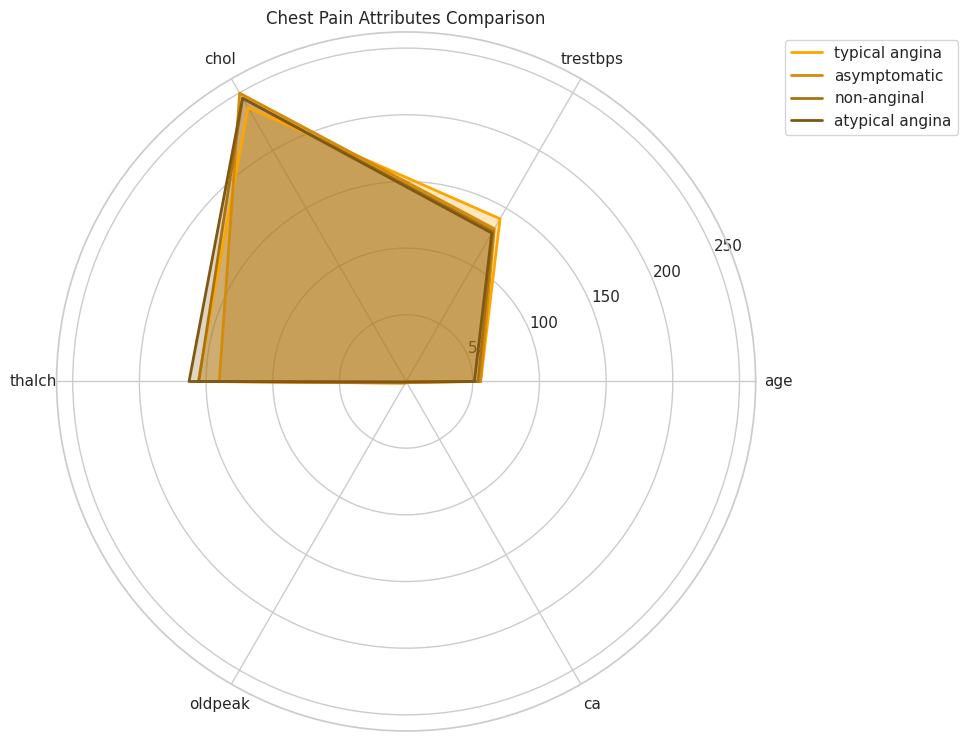

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
cp_attributes_comparison = df.loc[df['cp'].isin(['asymptomatic', 'non-anginal', 'atypical angina','typical angina'])]
attributes_to_compare = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for cp in cp_attributes_comparison['cp'].unique():
    cp_data = cp_attributes_comparison.loc[cp_attributes_comparison['cp'] == cp]
    
    # Calculate mean values for each attribute
    values = cp_data[attributes_to_compare].mean().values.flatten().tolist()
    values += values[:1]  # Close the circle for radar plot

    angles = [n / float(len(attributes_to_compare)) * 2 * np.pi for n in range(len(attributes_to_compare))]
    angles += angles[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=cp)
    ax.fill(angles, values, alpha=0.25)

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes_to_compare)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Add title
plt.title('Chest Pain Attributes Comparison')

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
jobs = pd.read_csv("/kaggle/input/titanic/jobstreet_all_job_dataset.csv")
jobs = jobs.sample(5000)
jobs = jobs.drop(columns=['job_id'], axis=1)
jobs = jobs.reset_index()
jobs = jobs.drop(columns=['index'], axis=1)
display(jobs.shape)
jobs.head(2)

(5000, 10)

job_title  \
0  Internship (Marketing, Business Admin, Account...   
1                  Site Supervisor (Interior Design)   

                           company  \
0  Green Hill Consultancy Solution   
1               wood & col sdn bhd   

                                        descriptions       location  \
0  Intern (Marketing Intern, Business Administrat...   Kuala Lumpur   
1  We are looking for an experienced\nSite Superv...  Penang Island   

                          category                subcategory  \
0  Administration & Office Support  Administrative Assistants   
1                     Construction     Foreperson/Supervisors   

              role           type                         salary  \
0       accounting  Contract/Temp  RM 1,000 – RM 1,500 per month   
1  interior-design      Full time  RM 2,900 – RM 4,000 per month   

            listingDate  
0  2024-03-27T06:12:16Z  
1  2024-04-04T22:44:39Z

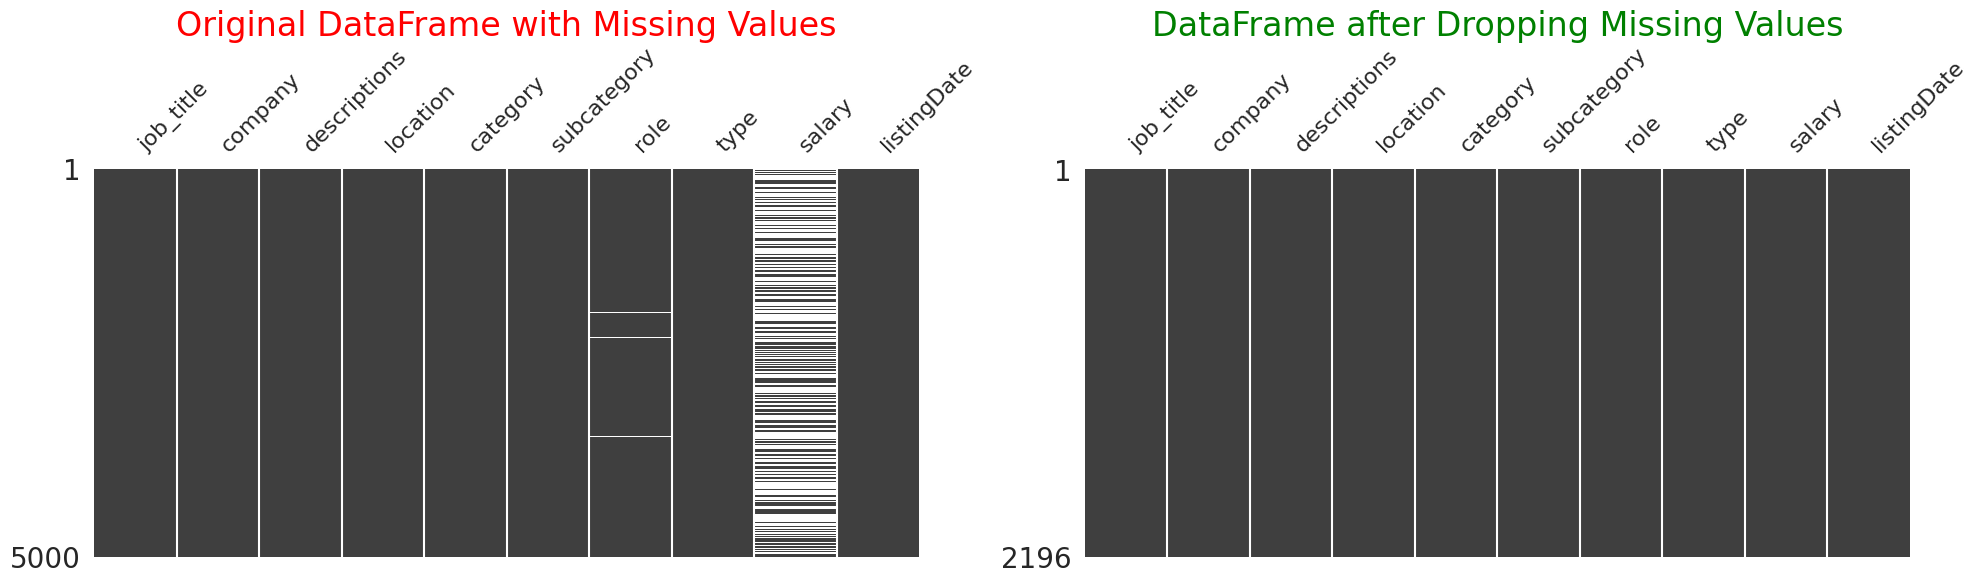

In [59]:
import missingno as msno

# Create a figure with two subplots arranged in a 1x2 grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the original DataFrame with missing values
msno.matrix(jobs, ax=axes[0])
axes[0].set_title("Original DataFrame with Missing Values",fontsize=24,color='Red')

# Drop rows with missing values and plot the resulting DataFrame
job = jobs.dropna()

msno.matrix(job, ax=axes[1])
axes[1].set_title("DataFrame after Dropping Missing Values",fontsize=24,color='Green')

plt.tight_layout()
plt.show()

In [60]:
import re

def clean_and_calculate_mean(salary):
    try:
        # Remove currency symbols, words, and extra characters
        salary = salary.replace('RM', '').replace('MYR', '').replace('$', '').replace('per month', '').replace('p.m.', '').replace('per year', '').replace('p.a.', '').strip()

        # Handle ranges with different separators
        if '–' in salary:
            salary_range = salary.split('–')
        elif '-' in salary:
            salary_range = salary.split('-')
        elif '—' in salary:
            salary_range = salary.split('—')
        else:
            salary_range = [salary]

        # Convert values to integers, handling potential errors
        salary_values = []
        for value in salary_range:
            try:
                value = int(float(value.replace(',', '').strip()))
                salary_values.append(value)
            except ValueError:
                pass  # Ignore non-numeric values

        # Calculate mean if at least two valid values are found
        if len(salary_values) >= 2:
            salary_mean = sum(salary_values) / len(salary_values)
            return salary_mean
        else:
            return None

    except Exception as e:
        print(f"Error processing salary '{salary}': {e}")
        return None

# Apply the function to the salary column
job['Salary'] = job['salary'].apply(clean_and_calculate_mean)
job = job.drop('salary',axis=1)
job.head(2)

job_title  \
0  Internship (Marketing, Business Admin, Account...   
1                  Site Supervisor (Interior Design)   

                           company  \
0  Green Hill Consultancy Solution   
1               wood & col sdn bhd   

                                        descriptions       location  \
0  Intern (Marketing Intern, Business Administrat...   Kuala Lumpur   
1  We are looking for an experienced\nSite Superv...  Penang Island   

                          category                subcategory  \
0  Administration & Office Support  Administrative Assistants   
1                     Construction     Foreperson/Supervisors   

              role           type           listingDate  Salary  
0       accounting  Contract/Temp  2024-03-27T06:12:16Z  1250.0  
1  interior-design      Full time  2024-04-04T22:44:39Z  3450.0

In [61]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

jobType = job['type'].value_counts()

fig = px.pie(values=jobType.values, names=jobType.index.tolist(), color=jobType.index.tolist(),color_discrete_sequence=['#FFA15A','#00FFFF','#EF553B', '#636EFA'])

fig.update_layout(width=1000, height=800)  

fig.update_traces(textfont_size=20)  

fig.update_traces(pull=[0.1, 0.1, 0.2], textposition='outside')

# Set layout properties
fig.update_layout(margin = dict(t=50, l=10, r=10, b=25),
                 title='Employment Types in the Job Market of Malaysia',
                 title_x=0.5,  
                 title_y=0.98)  

fig.show()

In [62]:
top_n = 50  

filtered_data = job['job_title'].value_counts().head(top_n).reset_index()
filtered_data.columns = ['job_title', 'count']

fig = px.treemap(filtered_data, path=[px.Constant('all'), 'job_title'], values='count')
fig.update_traces(root_color='lightgrey')

fig.update_traces(textfont_size=16)

fig.update_layout(width=1500, height=800)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                 title='Top Job Openings: Job Roles in Malaysia',
                 title_x=0.5,
                 title_y=0.98)

fig.show()

In [63]:
job.replace('Kuala Lumpur Sentral','Kuala Lumpur', inplace=True)
job.replace('Bangsar South', 'Bangsar', inplace=True)
job.replace('Klang District', 'Klang/Port Klang', inplace=True)
job.replace('Penang Island', 'Penang', inplace=True)
job['location'] = job['location'].str.replace(' District', '')

top_location = ['Kuala Lumpur', 'Petaling', 'Penang']
filtered_data = job[job['location'].isin(top_location)]

job_title_counts = filtered_data['job_title'].value_counts()

top_n = 10  
top_job_titles = job_title_counts.head(top_n).index.tolist()

filtered_data = filtered_data[filtered_data['job_title'].isin(top_job_titles)]

fig = px.treemap(filtered_data, path=[px.Constant('all'), 'location', 'job_title'])
fig.update_traces(root_color='lightgrey')
fig.update_layout(width=1500, height=800)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), 
                  title='Top Job Opportunities in Kuala Lumpur, Petaling, and Penang',
                  title_x=0.5,
                  title_y=0.98)
fig.show()

In [64]:
# plot a sunburst chart
fig = px.sunburst(job, path=['location','category'])

# configurate the plot layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    width=900,  # Set the width of the plot
    height=800,  # Set the height of the plot
    title='Job Vacancies Available Across Malaysia by Category',
    title_x=0.48,
    title_y=0.98
)

fig.show()

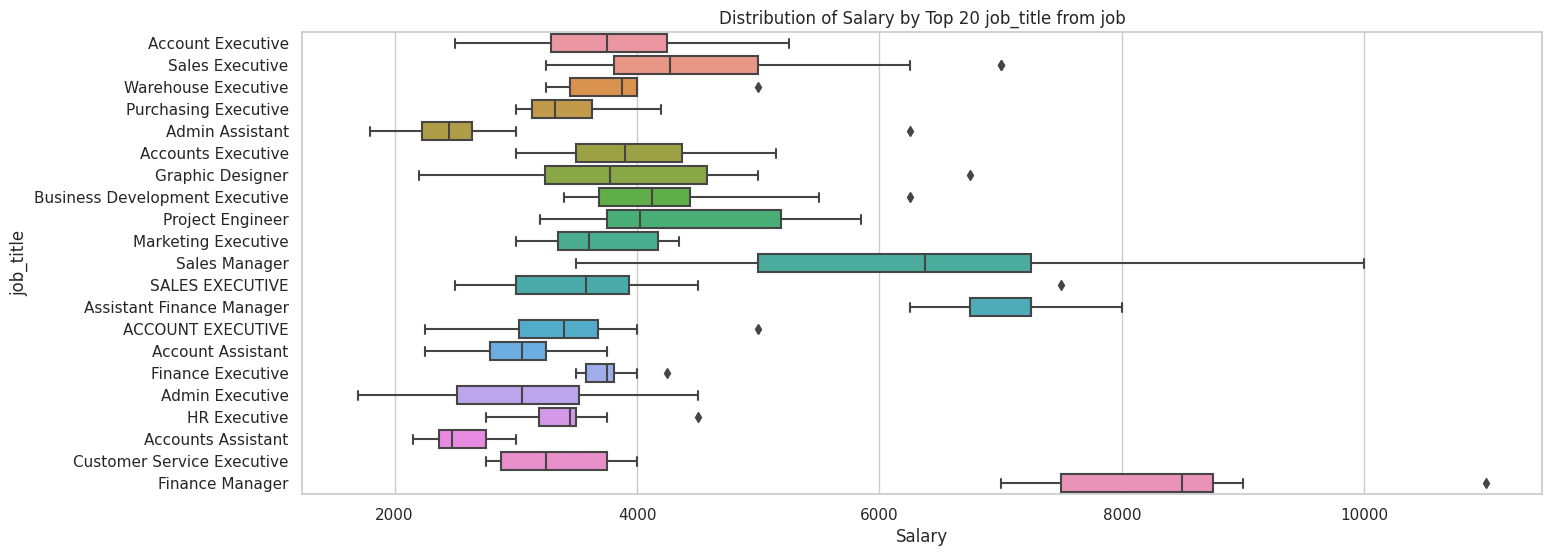

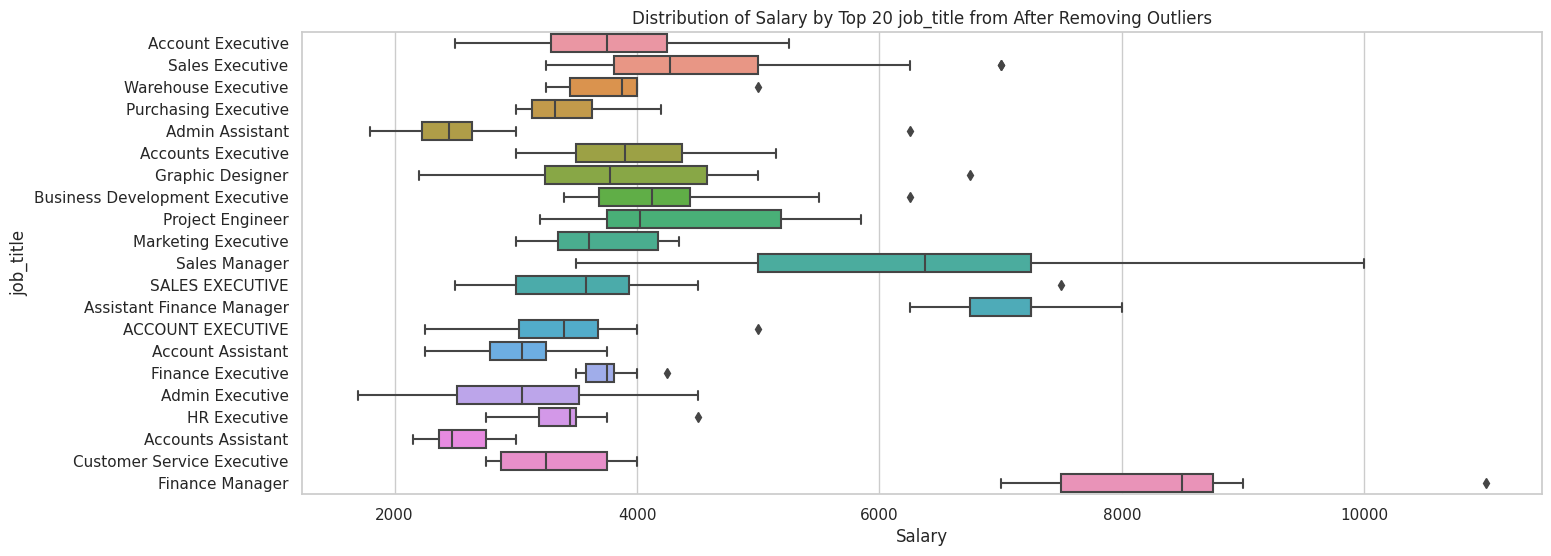

In [65]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.10)
  Q3 = df[column].quantile(0.85)
    
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR 

  df_outlier_free = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return df_outlier_free

jobs = remove_outliers_iqr(job, 'Salary')

#===========================================================================================================#

# Get top 20 job titles from both DataFrames
top_leagues_job = job['job_title'].value_counts().nlargest(20).index
top_leagues_jobs = jobs['job_title'].value_counts().nlargest(20).index

# Combine the top job titles
top_leagues = top_leagues_job.union(top_leagues_jobs)

# Plotting
plt.figure(figsize=(16, 6))
sns.boxplot(x='Salary', y='job_title', data=job[job['job_title'].isin(top_leagues)])
plt.title('Distribution of Salary by Top 20 job_title from job')
plt.xlabel('Salary')
plt.ylabel('job_title')
plt.show()

plt.figure(figsize=(16, 6))
sns.boxplot(x='Salary', y='job_title', data=jobs[jobs['job_title'].isin(top_leagues)])
plt.title('Distribution of Salary by Top 20 job_title from After Removing Outliers')
plt.xlabel('Salary')
plt.ylabel('job_title')
plt.show()

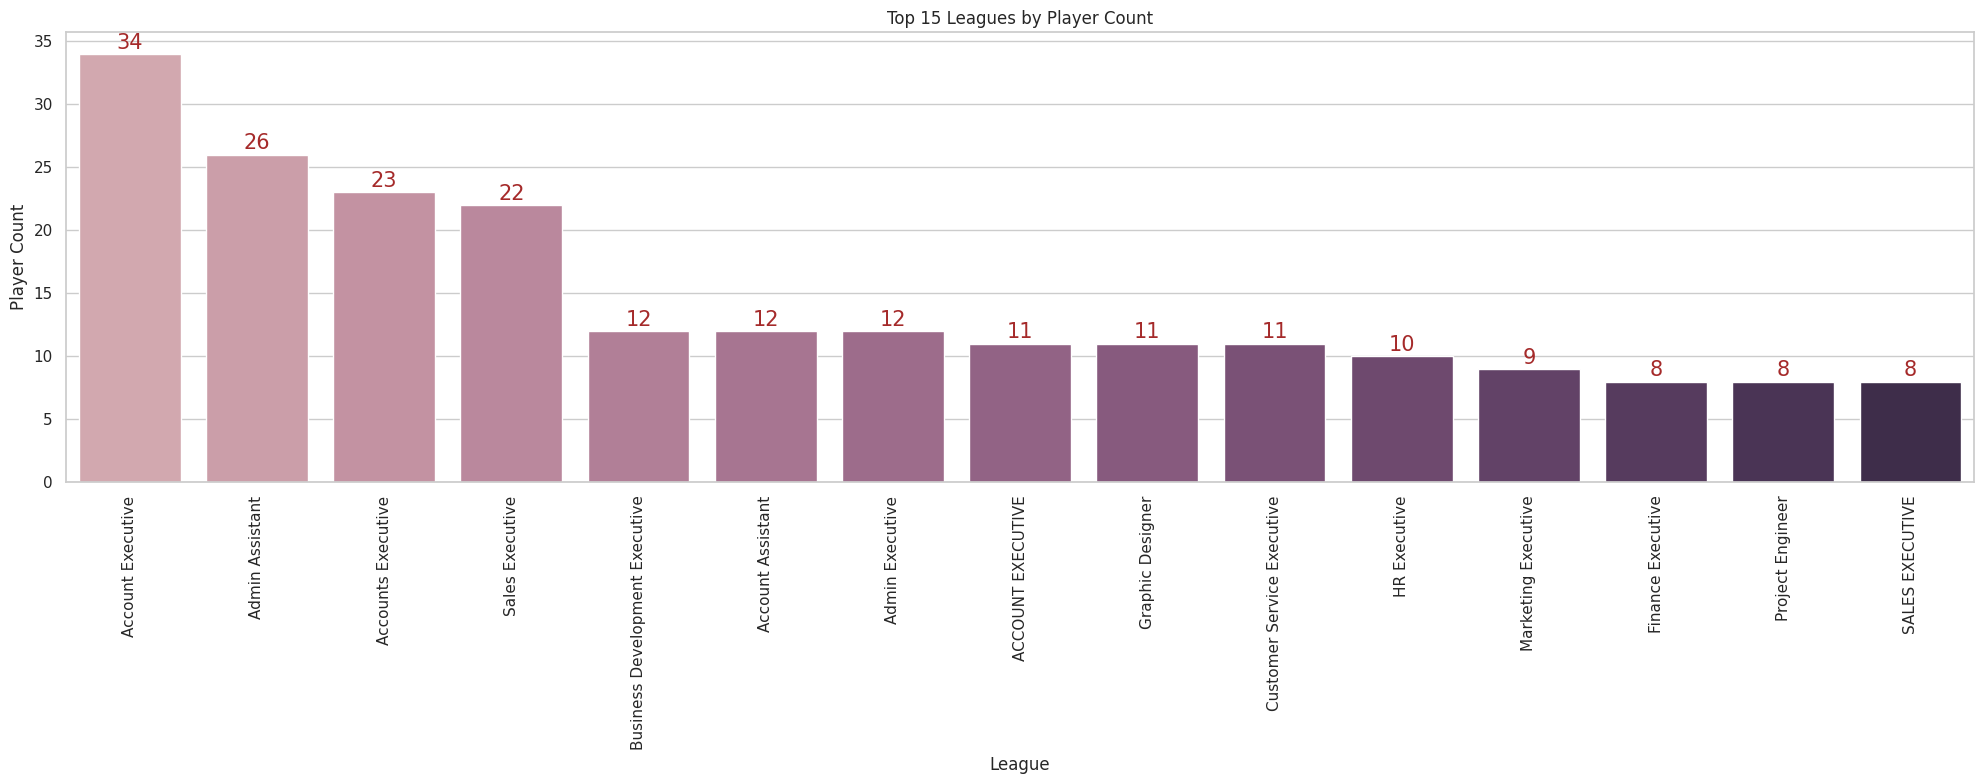

In [66]:
top_leagues = jobs['job_title'].value_counts().nlargest(15)

plt.figure(figsize=(20, 8))  

colors = sns.cubehelix_palette(len(top_leagues), light=0.7, dark=0.2)  
bar_plot = sns.barplot(x=top_leagues.index, y=top_leagues.values, palette=colors)

for index, value in enumerate(top_leagues.values):
    label = f"{value:,}"  
    plt.text(index, value + 0.1, label, ha='center', va='bottom', fontsize=15, color='#A52A2A')  

plt.title('Top 15 Leagues by Player Count')
plt.xlabel('League')
plt.ylabel('Player Count')
plt.xticks(rotation=90)
plt.tight_layout() 

plt.show()

In [67]:
tips_df = pd.read_csv("/kaggle/input/titanic/tip.csv")

display(tips_df.head(2))
fig = px.bar(tips_df, 
             x="sex", 
             y="total_bill", 
             color="smoker", 
             barmode="group",
             facet_row="time", 
             facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]})
fig.show()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

In [68]:
fig = px.box(tips_df, 
             x="time", 
             y="total_bill", 
             points="all")
fig.show()

In [69]:
fig = px.box(tips_df, 
             x="time", 
             y="total_bill", 
             points="outliers")
fig.show()

In [70]:
fig = px.box(tips_df, 
             x="day", 
             y="total_bill", 
             color="smoker" )
fig.update_traces(quartilemethod="linear") 
fig.show()


In [71]:
fig = px.box(tips_df,
             x="time", 
             y="total_bill", 
             color="smoker",
             notched=True, 
             hover_data=["day"] # add day column to hover data
            )
fig.show()

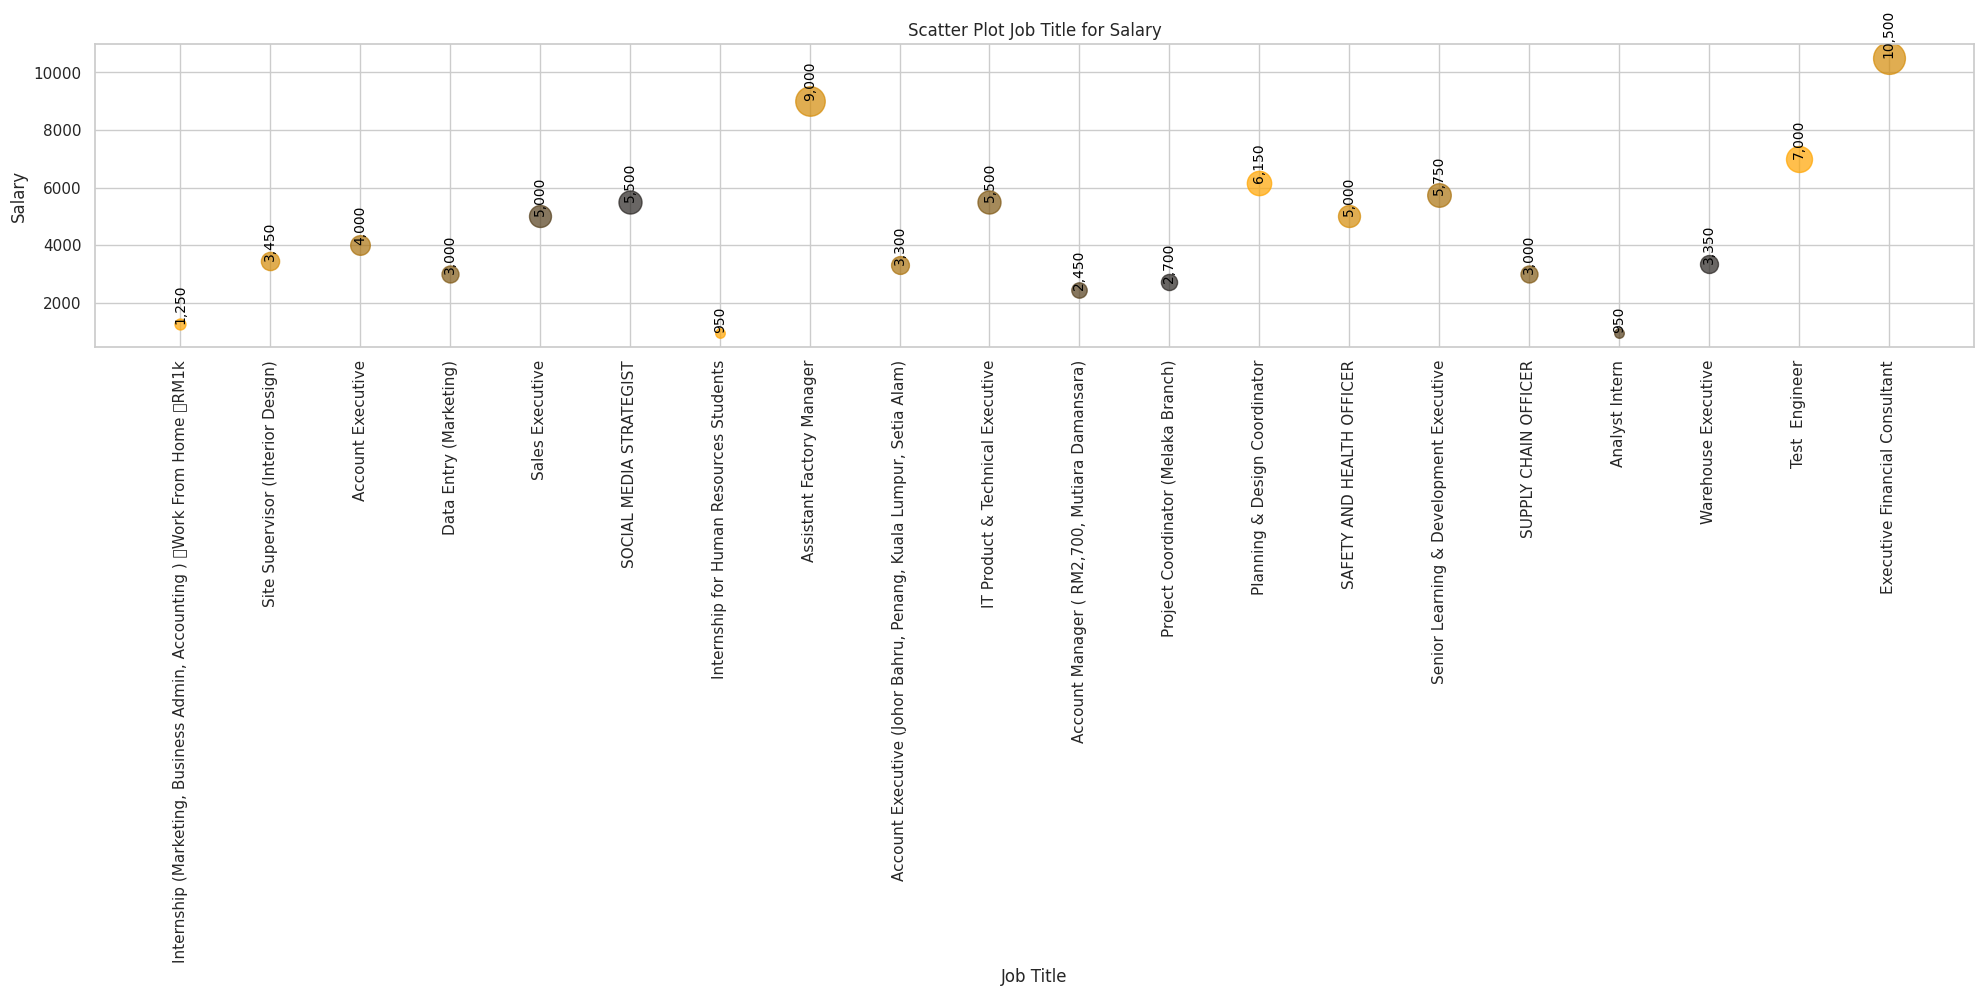

In [72]:
plt.figure(figsize=(20, 10))

x = jobs['job_title'].head(20)
y = jobs['Salary'].head(20)

# Plot the scatter plot with country names and numbers on y-axis
marker_sizes = jobs['Salary'] 
for i, country in enumerate(x):
    plt.scatter(country, y.iloc[i], s=(marker_sizes.iloc[i])/20, label=country, alpha=0.7)
    plt.text(country, y.iloc[i], f'{y.iloc[i]:,.0f}', ha='center', va='bottom', rotation='vertical', fontsize=10, color='black')

# Set y-axis to display numbers in billions
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(9, 9))

plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Scatter Plot Job Title for Salary')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()

In [73]:
wind = pd.read_csv('/kaggle/input/wind-turbine-power-generation-forecasting/Train.csv')
display(wind.head(2))

WINdIR = ['E','ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

import plotly.graph_objects as go

fig = go.Figure()

# Add traces with dark red color
fig.add_trace(go.Scatterpolar(
    r=wind.groupby('WD_10m')['Power'].mean(),
    theta=WINdIR,
    name='Wind Dir. 3pm',
    fill='toself',
    marker=dict(color='Yellow')  # Set color for Wind Dir. 3pm trace
))

fig.add_trace(go.Scatterpolar(
    r=wind.groupby('WD_100m')['Power'].mean(),
    theta=WINdIR,
    name='Wind Dir. 9am',
    fill='toself',
    marker=dict(color='Blue')  # Set color for Wind Dir. 9am trace
))

# Update layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=False)),
    showlegend=True,
    title='Wind Direction Vs Power',
    titlefont={'size': 28, 'family': 'Serif'},
    template='plotly_dark',
    paper_bgcolor='darkgray',
    width=600,
    height=500
)

fig.show()

Unnamed: 0              Time  Location  Temp_2m  RelHum_2m  DP_2m  WS_10m  \
0           0  02-01-2013 00:00         1    28.28      84.66  24.07    1.61   
1           1  02-01-2013 01:00         1    28.18      85.66  24.27    2.23   

   WS_100m  WD_10m  WD_100m  WG_10m  Power  
0     1.27  145.05   161.06    1.34   0.16  
1     4.00  150.05   157.06    4.34   0.14

In [74]:
wind = pd.read_csv('/kaggle/input/wind-turbine-power-generation-forecasting/Train.csv')
display(wind.head(2))

WINdIR = ['E','ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']



fig = go.Figure()

fig.add_trace(go.Barpolar(r=wind.groupby('WD_100m')['Power'].mean(),
                          theta=WINdIR,
                          name='WD_100m'
                          )
             )
fig.add_trace(go.Barpolar(r=wind.groupby('WD_10m')['Power'].mean(),
                          theta=WINdIR,
                          name='WD_10m'
                          )
             )
fig.update_layout(polar=dict(radialaxis=dict(visible=False,
                                             )
                             ),
                  showlegend=True,
                  title='Power vs Wind Direction',
                  titlefont={'size': 28, 'family':'Serif'},
                  template='plotly_dark',
                  paper_bgcolor='gray',
                  width=600, height=500,
                 )
fig.show()

Unnamed: 0              Time  Location  Temp_2m  RelHum_2m  DP_2m  WS_10m  \
0           0  02-01-2013 00:00         1    28.28      84.66  24.07    1.61   
1           1  02-01-2013 01:00         1    28.18      85.66  24.27    2.23   

   WS_100m  WD_10m  WD_100m  WG_10m  Power  
0     1.27  145.05   161.06    1.34   0.16  
1     4.00  150.05   157.06    4.34   0.14

(5000, 10)

job_title  \
0                          IMP MAINTENANCE EXECUTIVE   
1  Finance Executive (Full Set Accounts) - Malacc...   

                                         company  \
0                           Ann Joo Steel Berhad   
1  Agensi Pekerjaan PERSOLKELLY Malaysia Sdn Bhd   

                                        descriptions        location  \
0  Description\nJob Description\n1. Provide techn...  Seberang Perai   
1  Job Scope:\n• Handle full set of accounts, AP,...          Melaka   

      category                              subcategory  \
0  Engineering                              Supervisors   
1   Accounting  Bookkeeping & Small Practice Accounting   

                    role       type                         salary  \
0  maintenance-executive  Full time                            NaN   
1      finance-executive  Full time  RM 3,000 – RM 4,000 per month   

            listingDate  
0  2024-03-01T20:37:00Z  
1  2024-02-26T02:41:15Z

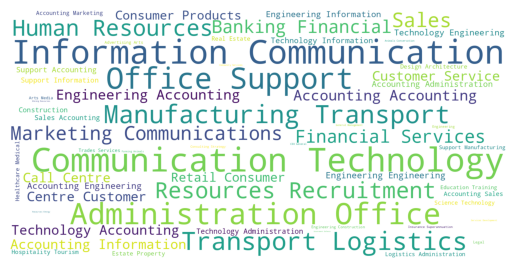

In [75]:
jobs = pd.read_csv("/kaggle/input/titanic/jobstreet_all_job_dataset.csv")
jobs = jobs.sample(5000)
jobs = jobs.drop(columns=['job_id'], axis=1)
jobs = jobs.reset_index()
jobs = jobs.drop(columns=['index'], axis=1)
display(jobs.shape)
display(jobs.head(2))

from wordcloud import WordCloud

text = str(list(jobs['category'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

wordcloud = WordCloud(background_color = 'white', width = 1600,  height = 800, max_words = 121).generate(text)
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [76]:
# Drop rows with missing values and plot the resulting DataFrame
job = jobs.dropna()

import re

def clean_and_calculate_mean(salary):
    try:
        # Remove currency symbols, words, and extra characters
        salary = salary.replace('RM', '').replace('MYR', '').replace('$', '').replace('per month', '').replace('p.m.', '').replace('per year', '').replace('p.a.', '').strip()

        # Handle ranges with different separators
        if '–' in salary:
            salary_range = salary.split('–')
        elif '-' in salary:
            salary_range = salary.split('-')
        elif '—' in salary:
            salary_range = salary.split('—')
        else:
            salary_range = [salary]

        # Convert values to integers, handling potential errors
        salary_values = []
        for value in salary_range:
            try:
                value = int(float(value.replace(',', '').strip()))
                salary_values.append(value)
            except ValueError:
                pass  # Ignore non-numeric values

        # Calculate mean if at least two valid values are found
        if len(salary_values) >= 2:
            salary_mean = sum(salary_values) / len(salary_values)
            return salary_mean
        else:
            return None

    except Exception as e:
        print(f"Error processing salary '{salary}': {e}")
        return None

# Apply the function to the salary column
job['Salary'] = job['salary'].apply(clean_and_calculate_mean)
job = job.drop('salary',axis=1)
job.head(2)

job_title  \
1  Finance Executive (Full Set Accounts) - Malacc...   
2    Customer Service Advisor (Mandarin & Cantonese)   

                                         company  \
1  Agensi Pekerjaan PERSOLKELLY Malaysia Sdn Bhd   
2                                   Webhelp APAC   

                                        descriptions  \
1  Job Scope:\n• Handle full set of accounts, AP,...   
2  Job Highlight:\nCompetitive salary package\nWo...   

                   location                        category  \
1                    Melaka                      Accounting   
2  Kuala Lumpur City Centre  Call Centre & Customer Service   

                               subcategory                      role  \
1  Bookkeeping & Small Practice Accounting         finance-executive   
2           Customer Service - Call Centre  customer-service-adviser   

        type           listingDate  Salary  
1  Full time  2024-02-26T02:41:15Z  3500.0  
2  Full time  2024-03-27T07:30:27Z  4000.0

In [77]:
dfp = job['role'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = job['location'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = job['company'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(y = dfp['role'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(y = dfl['location'],
                     orientation='h',
                     name = 'Location',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(y = dfc['company'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Position", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 Positions, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

In [78]:
# Read data
df = pd.read_csv('/kaggle/input/titanic/US_Job_Market.csv')
df.head(3)

position             company  \
0                               Development Director             ALS TDI   
1  An Ostentatiously-Excitable Principal Research...  The Hexagon Lavish   
2                                     Data Scientist      Xpert Staffing   

                                         description  reviews  \
0  Development Director\nALS Therapy Development ...      NaN   
1  Job Description\n\n"The road that leads to acc...      NaN   
2  Growing company located in the Atlanta, GA are...      NaN   

             location  
0  Atlanta, GA 30301   
1         Atlanta, GA  
2         Atlanta, GA

In [79]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 44.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go


dfd1 = df[df['position']== 'Data Scientist']
dfd2 = df[df['position']== 'Senior Data Scientist']
dfd3 = df[df['position']== 'Research Analyst']
dfd4 = df[df['position']== 'Data Engineer']

# Add 'position' column to each dataframe
redf1 = dfd1[["location", "position"]].value_counts().nlargest(10).sort_values(ascending = True).reset_index()
redf2 = dfd2[["location", "position"]].value_counts().nlargest(10).sort_values(ascending = True).reset_index()
redf3 = dfd3[["location", "position"]].value_counts().nlargest(10).sort_values(ascending = True).reset_index()
redf4 = dfd4[["location", "position"]].value_counts().nlargest(10).sort_values(ascending = True).reset_index()
# Create Plotly figure
fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["location"],
                     y = redf1["count"],
                     marker = dict(color = 'Tomato'),
                     name = 'Data Scientist'))
fig.add_trace(go.Bar(x = redf2['location'],
                     y = redf2['count'],
                     name = 'Senior Data Scientist',
                     marker = dict(color = 'LightCoral')))
fig.add_trace(go.Bar(x = redf3['location'],
                     y = redf3['count'],
                     name = 'Research Analyst',
                     marker = dict(color = 'SteelBlue')))
fig.add_trace(go.Bar(x = redf4['location'],
                     y = redf4['count'],
                     name = 'Data Engineer',
                     marker = dict(color = 'CadetBlue')))

# Update Layout with dropdown functionality
fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Data Scientist", 
                     method="update", 
                     args=[ {"visible": [True, False, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Senior Data Scientist', 
                     method="update", 
                     args=[ {"visible": [False, True, False, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Research Analyst', 
                     method="update", 
                     args=[ {"visible": [False, False, True, False]}, 
                            {'showlegend' : True} 
                        ]),  
                dict(label='Data Engineer', 
                     method="update", 
                     args=[ {"visible": [False, False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of states by four Positions",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()